In [1]:
import pymysql
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
connection = pymysql.connect(
    host="localhost",
    user="root",
    password="123456",
    database="customer_churn"
)

In [53]:
cursor = connection.cursor()

In [54]:
cursor.execute("select * from customer_churn.`wa_fn-usec_-telco-customer-churn`;")

7032

In [55]:
df=pd.read_sql("select * from customer_churn.`wa_fn-usec_-telco-customer-churn`;",connection)

In [56]:
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


In [57]:
df.shape

(7032, 21)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [59]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7032.00,0.16,0.37,0.00,0.00,0.00,0.00,1.00
tenure,7032.00,32.42,24.55,1.00,9.00,29.00,55.00,72.00
MonthlyCharges,7032.00,64.80,30.09,18.25,35.59,70.35,89.86,118.75
TotalCharges,7032.00,2283.30,2266.77,18.80,401.45,1397.47,3794.74,8684.80


In [60]:
df.describe(include="object").T

,count,unique,top,freq
customerID,7032,7032,7590-VHVEG,1
gender,7032,2,Male,3549
Partner,7032,2,No,3639
Dependents,7032,2,No,4933
PhoneService,7032,2,Yes,6352
MultipleLines,7032,3,No,3385
InternetService,7032,3,Fiber optic,3096
OnlineSecurity,7032,3,No,3497
OnlineBackup,7032,3,No,3087
DeviceProtection,7032,3,No,3094


In [61]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

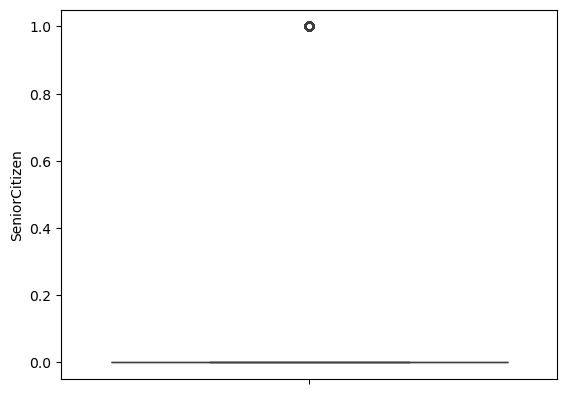

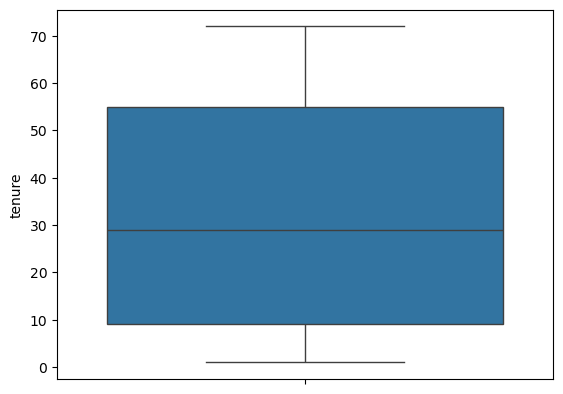

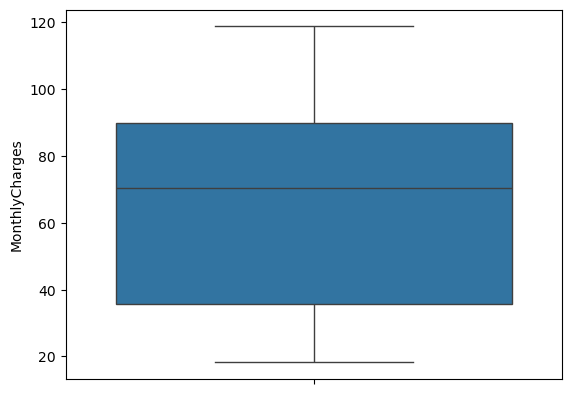

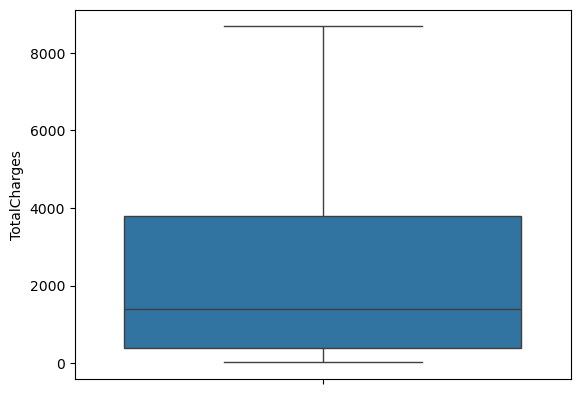

In [62]:
# Check Outliers
for i in df.columns:
    if df[i].dtypes!="object":
        sns.boxplot(df[i])
        plt.show()

In [63]:
# Check Coorelation
num=pd.DataFrame([])
for i in df.columns:
    if df[i].dtypes!="object":
        num[i]=df[i]

<Axes: >

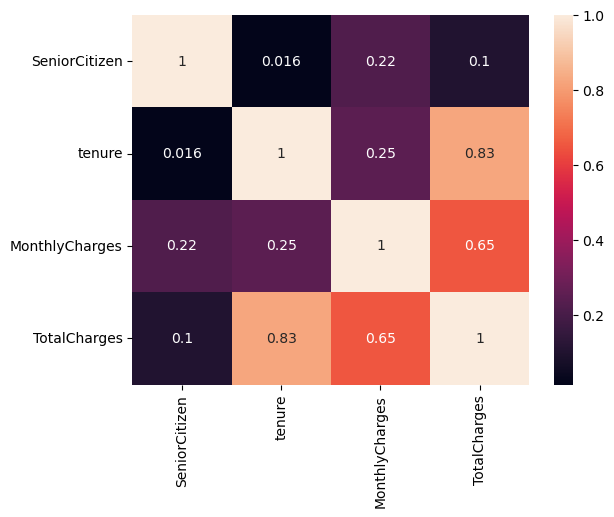

In [64]:
sns.heatmap(num.corr(),annot=True)

In [65]:
df.drop(["customerID","TotalCharges","tenure"],axis=1,inplace=True)

In [66]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,No
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,Yes
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,No
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,Yes


In [90]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

In [68]:
LE=LabelEncoder()
std=StandardScaler()

In [69]:
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=LE.fit_transform(df[i])

In [70]:
df

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,29.85,0
1,1,0,0,0,1,0,0,2,0,2,0,0,0,1,0,3,56.95,0
2,1,0,0,0,1,0,0,2,2,0,0,0,0,0,1,3,53.85,1
3,1,0,0,0,0,1,0,2,0,2,2,0,0,1,0,0,42.30,0
4,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,70.70,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,1,0,1,1,1,2,0,2,0,2,2,2,2,1,1,3,84.80,0
7028,0,0,1,1,1,2,1,0,2,2,0,2,2,1,1,1,103.20,0
7029,0,0,1,1,0,1,0,2,0,0,0,0,0,0,1,2,29.60,0
7030,1,1,1,0,1,2,1,0,0,0,0,0,0,0,1,3,74.40,1


In [71]:
x=df.drop("Churn",axis=1)
y=df.Churn

In [82]:
x_scaled=std.fit_transform(x)

In [98]:
x_scaled2=MinMaxScaler().fit_transform(x)

In [99]:
from sklearn.model_selection import train_test_split

In [100]:
xtrain,xtest,ytrain,ytest=train_test_split(x_scaled2,y,test_size=0.2)

In [101]:
from lazypredict.Supervised import LazyClassifier

In [102]:
LC=LazyClassifier()

In [103]:
models,predictions=LC.fit(xtrain,xtest,ytrain,ytest)

  0%|          | 0/32 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 1498, number of negative: 4127
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000470 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 314
[LightGBM] [Info] Number of data points in the train set: 5625, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.266311 -> initscore=-1.013420
[LightGBM] [Info] Start training from score -1.013420


In [104]:
print(models)

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
QuadraticDiscriminantAnalysis      0.77               0.77     0.77      0.78   
NearestCentroid                    0.72               0.76     0.76      0.74   
GaussianNB                         0.75               0.76     0.76      0.77   
BernoulliNB                        0.75               0.75     0.75      0.76   
AdaBoostClassifier                 0.79               0.72     0.72      0.79   
LogisticRegression                 0.80               0.72     0.72      0.79   
LinearDiscriminantAnalysis         0.79               0.72     0.72      0.79   
CalibratedClassifierCV             0.80               0.72     0.72      0.79   
LGBMClassifier                     0.79               0.72     0.72      0.79   
XGBClassifier                      0.78               0.71     0.71      0.78   
LinearSVC                   

In [106]:
from sklearn.linear_model import LogisticRegression

In [107]:
LR=LogisticRegression()

In [108]:
LR.fit(xtrain,ytrain)

LogisticRegression()

In [109]:
LR.score(xtest,ytest)

0.7967306325515281

In [112]:
import joblib

In [113]:
joblib.dump(LR,"churn_prediction.pkl")

['churn_prediction.pkl']